# Task 1 - Exploratory Data Analysis

## Section 1 - Setup

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

---

## Section 2 - Data loading

In [23]:
path = "data/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


---

## Section 3 - Descriptive statistics

In this section, you should try to gain a description of the data, that is: what columns are present, how many null values exist and what data types exists within each column.

After this, you should try to compute some descriptive statistics of the numerical columns within the dataset, such as:

- mean
- median
- count
- etc...

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


The dataset has 8 columns and 7829 rows. We can see that there is no row with no missing data. Numerical columns are `unit_price`, `quantity` and `total`.

In [25]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


The above code shows descriptive statistics for `unit_price`, `quantity` and `total`. The columns don't have any irregular values (like negative values and values with zero).

In [63]:
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour
df['day'] = pd.to_datetime(df['timestamp']).dt.day
df['day_name'] = pd.to_datetime(df['timestamp']).dt.day_name()


Extracted the day and hour from timestamp

---

## Section 4 - Visualisation

To analyse the dataset, below are snippets of code that you can use as helper functions to visualise different columns within the dataset. They include:

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns
- correlation_plot = this is to plot the correlations between the numeric columns within the data

In [38]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def correlation_plot(data: pd.DataFrame = None):
  corr = data.corr()
  corr.style.background_gradient(cmap='coolwarm')

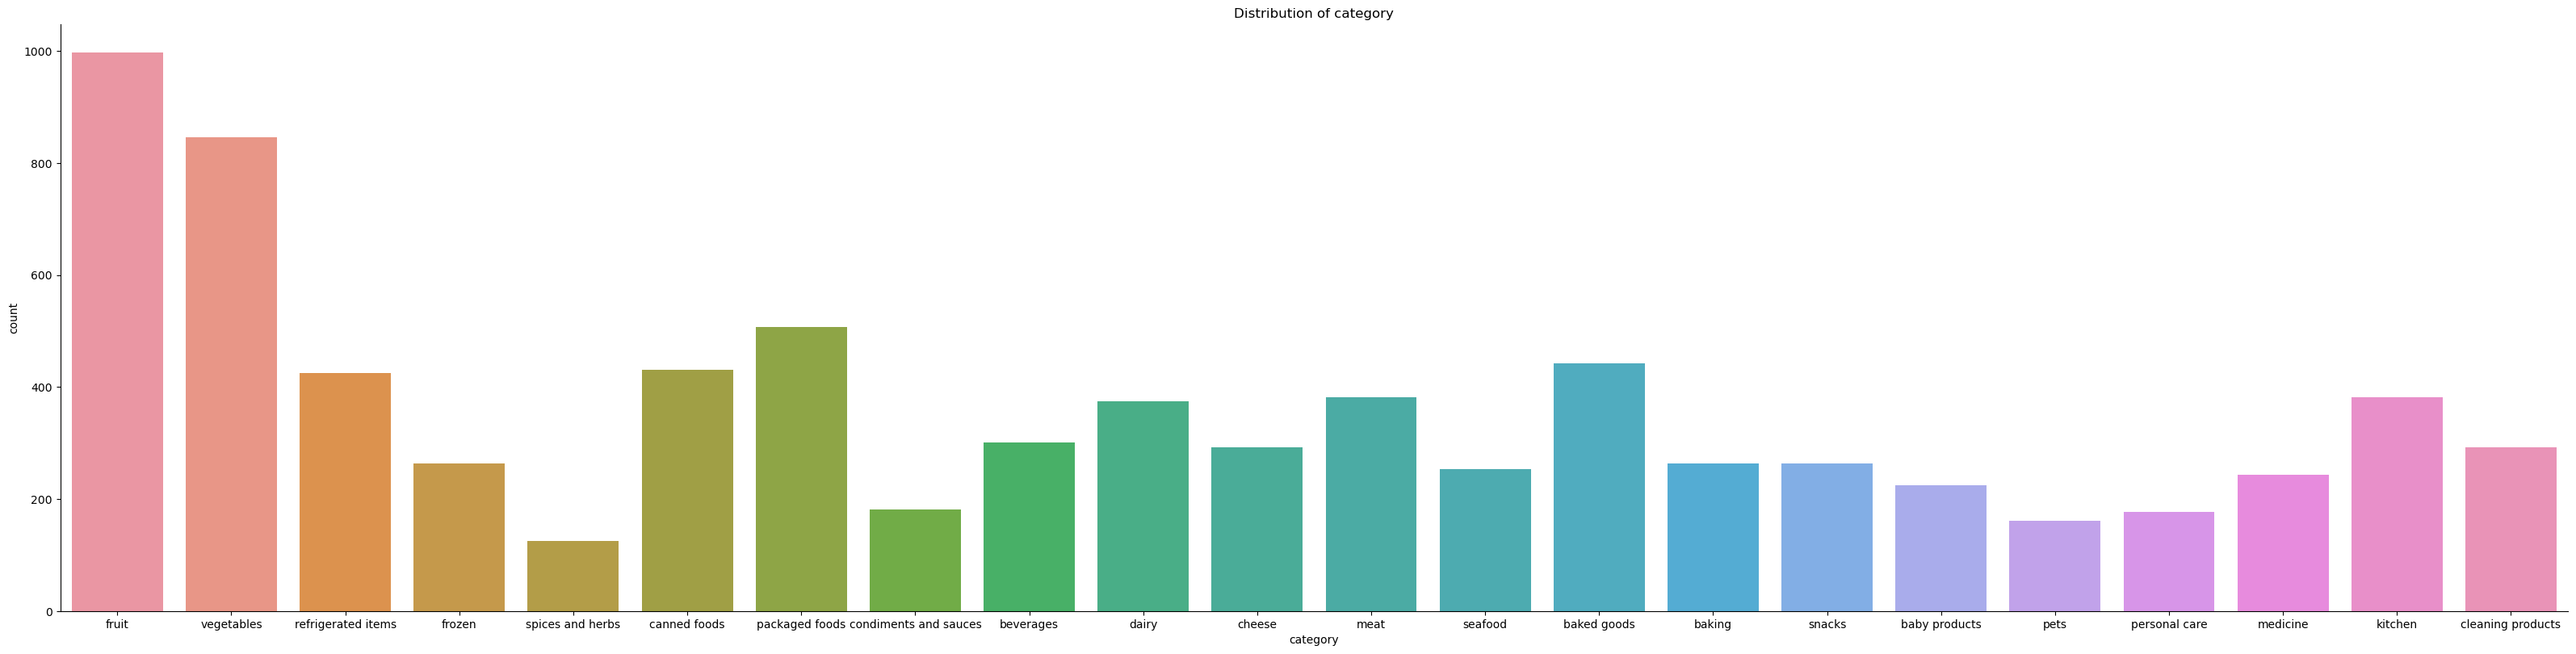

In [44]:
plot_categorical_distribution(df,'category',aspect=4)

In this data fruits and vegetables are the most sold category of items.

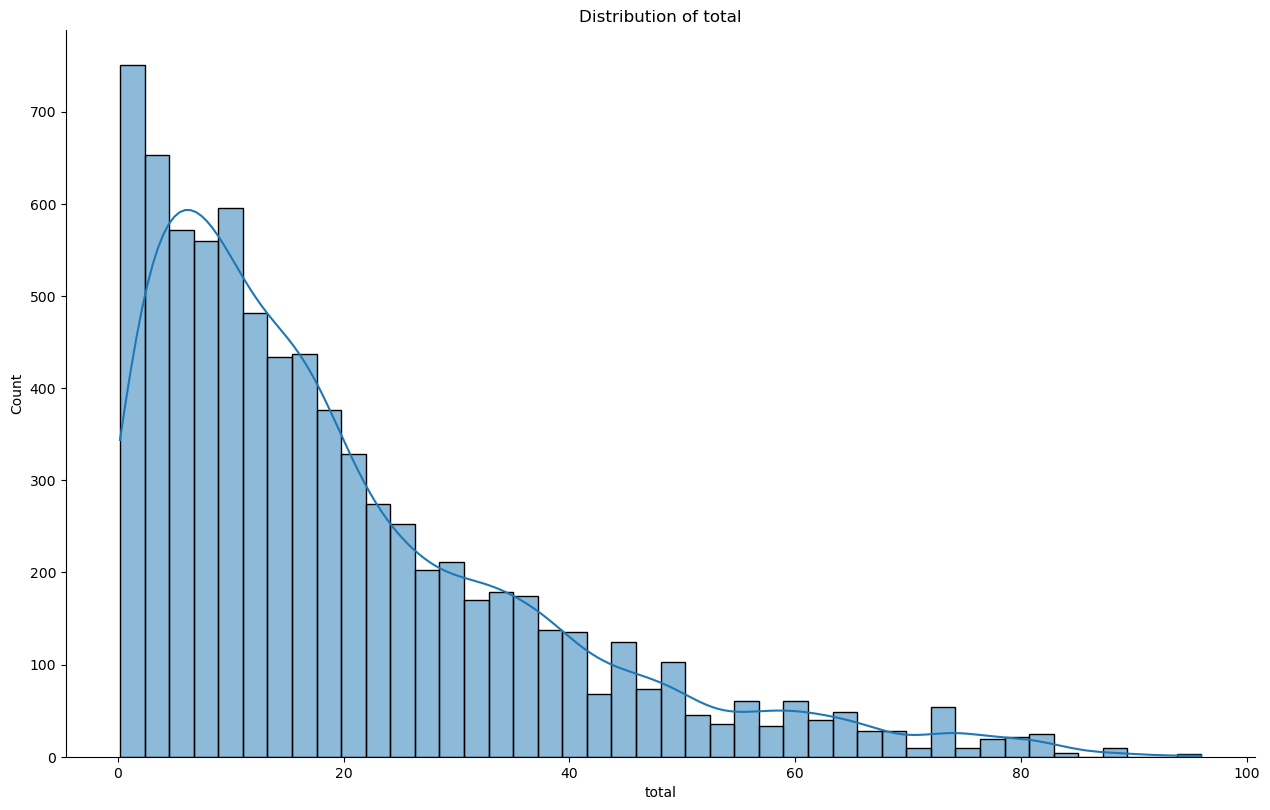

In [46]:
plot_continuous_distribution(df,'total')

Total sales is right skewed with most of sales are between 0$-20$. 

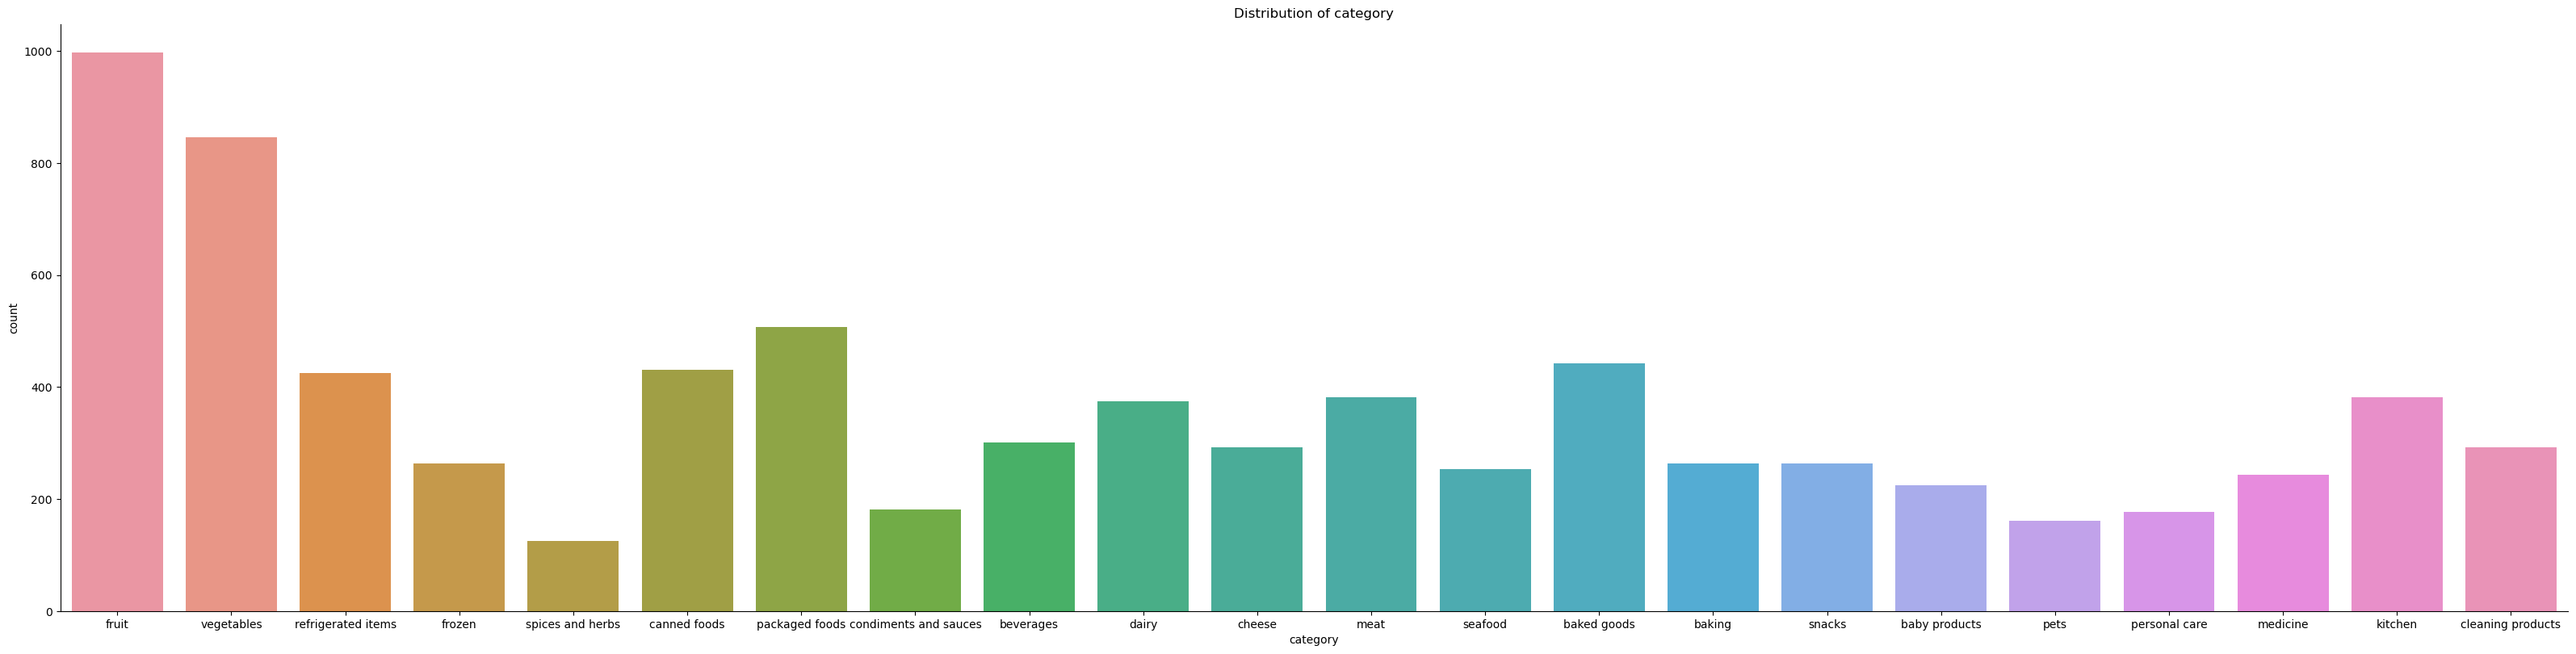

In [53]:
plot_categorical_distribution(df,'category',aspect=4)

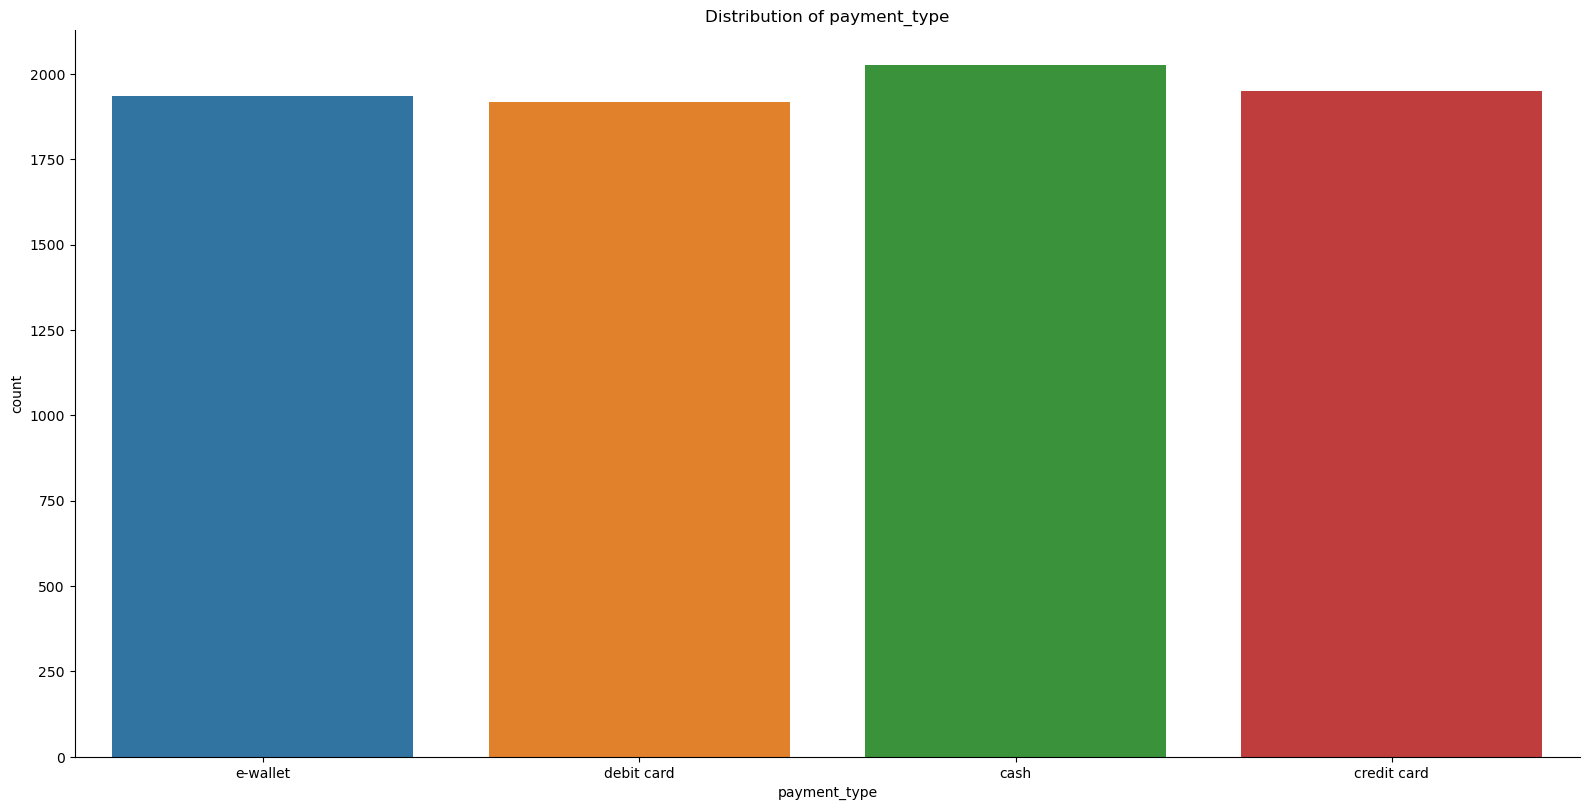

In [47]:
plot_categorical_distribution(df,'payment_type')

In [50]:
get_unique_values(df,'payment_type')

Column: payment_type has 4 unique values

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64


The distribution of payment methods are uniform with cash paying customers being a bit more.

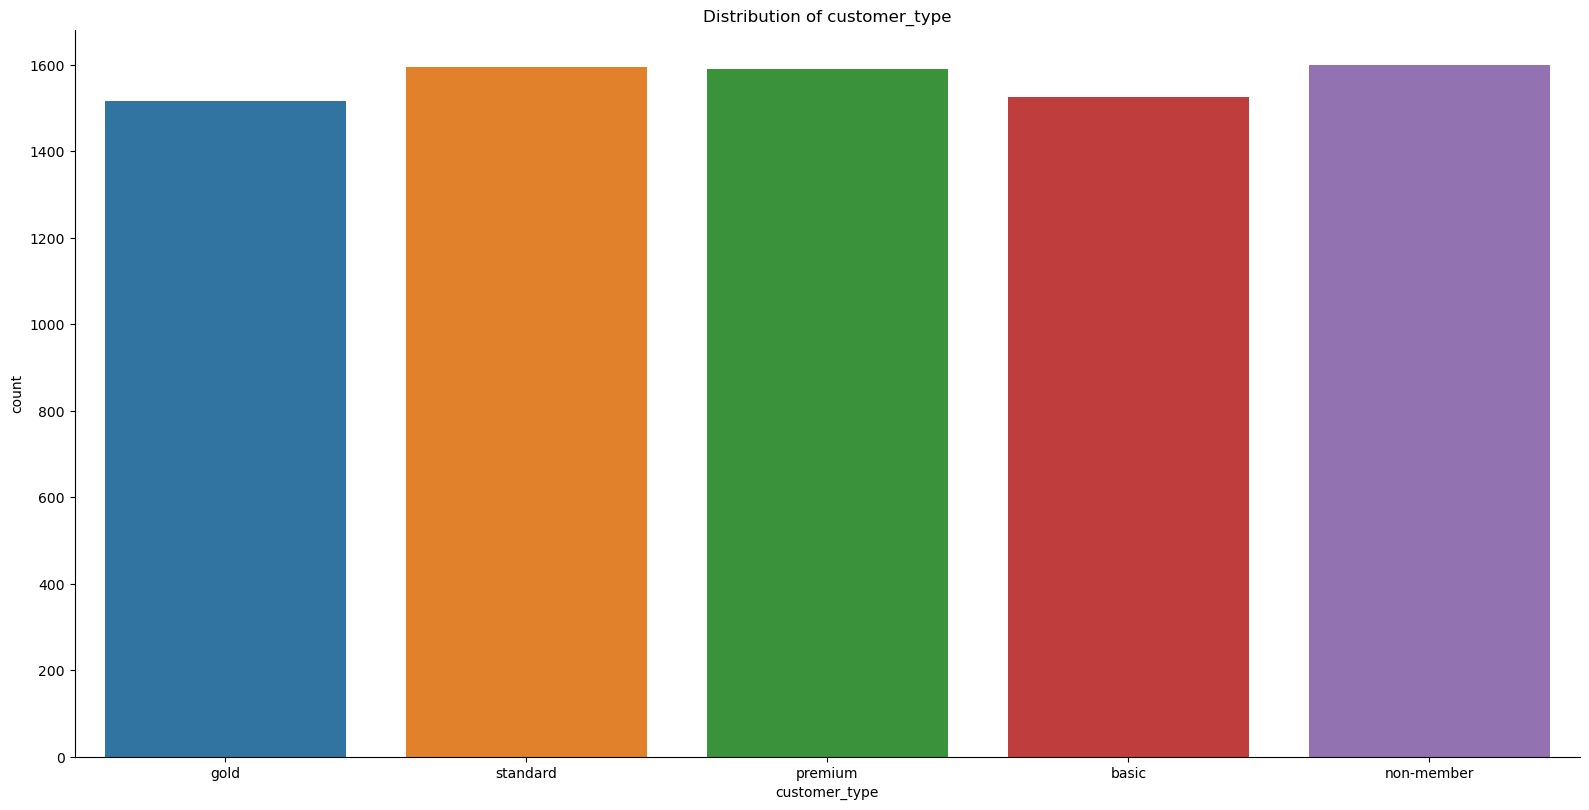

In [48]:
plot_categorical_distribution(df,'customer_type')

In [49]:
get_unique_values(df,'customer_type')

Column: customer_type has 5 unique values

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64


The distribution of `customer_type` is almost uniform with gold members being the fewest and non-member customers being the highest.

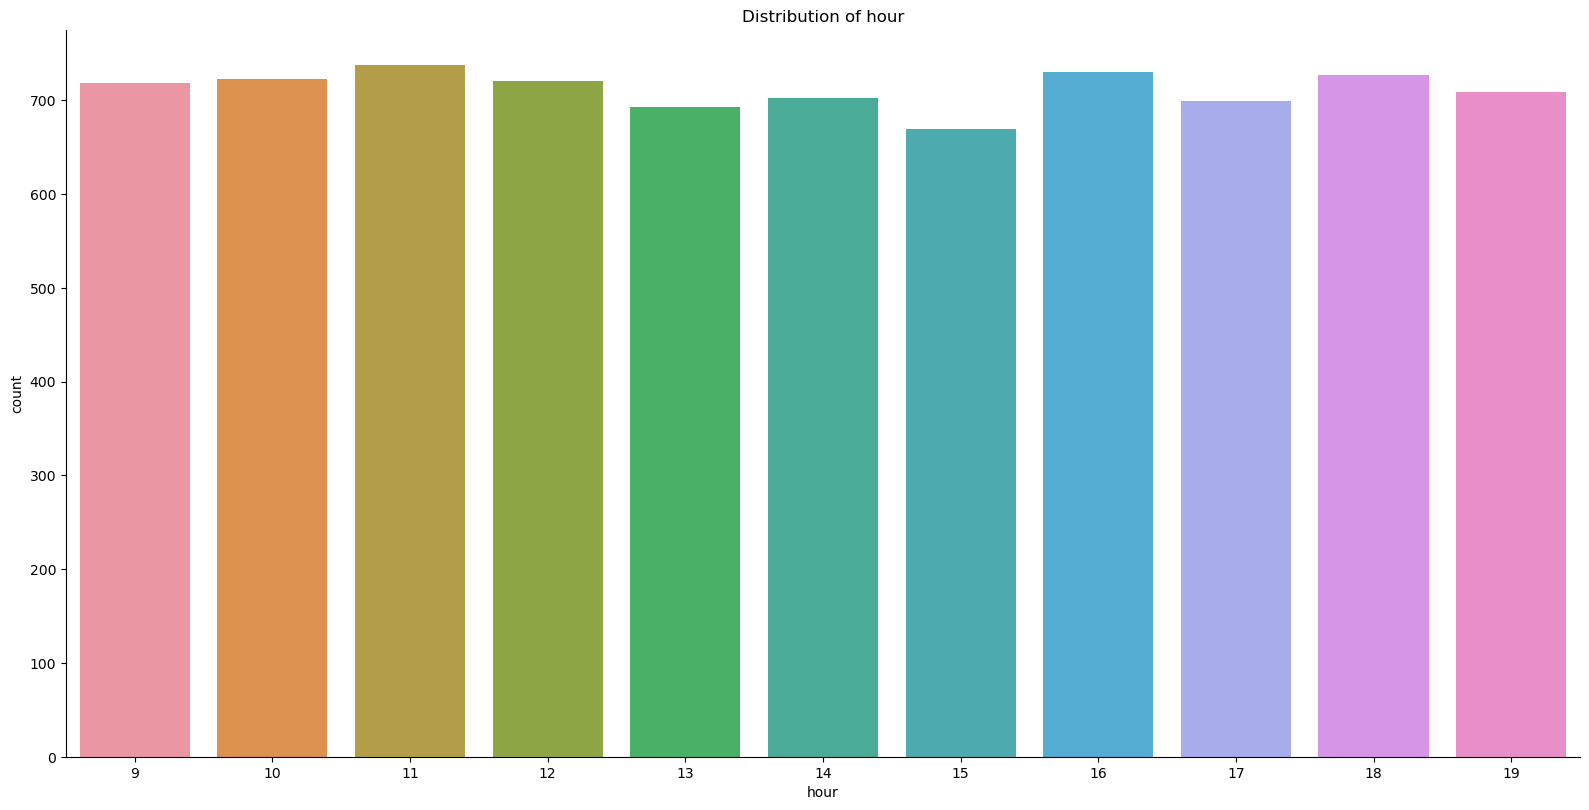

In [58]:
plot_categorical_distribution(df,'hour')

In [65]:
get_unique_values(df,'hour')

Column: hour has 11 unique values

11    738
16    730
18    727
10    723
12    721
9     718
19    709
14    702
17    699
13    693
15    669
Name: hour, dtype: int64


11AM and 4PM seems to be the busiest times.

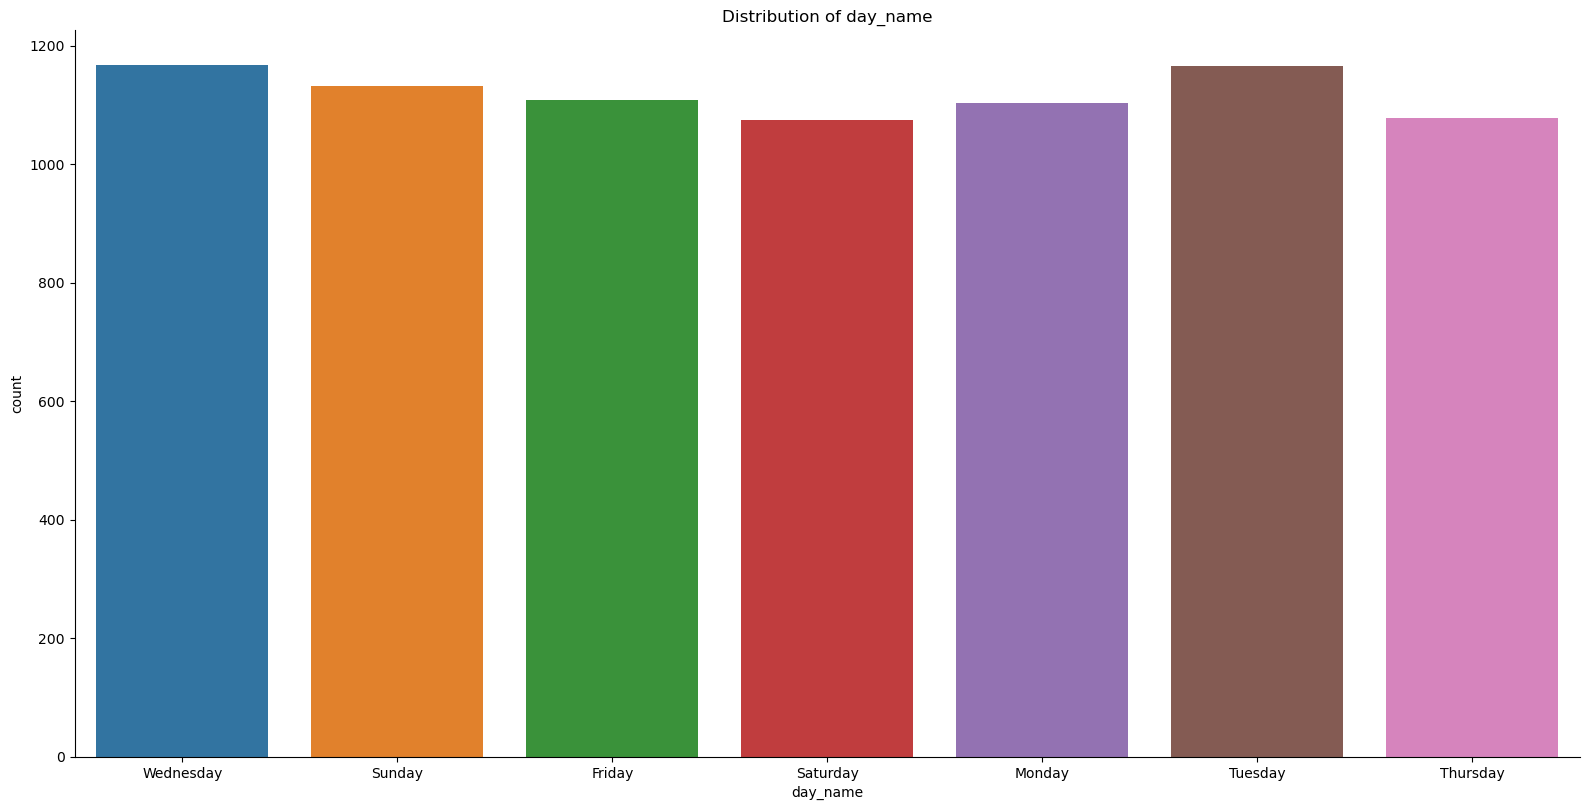

In [64]:
plot_categorical_distribution(df,'day_name')

In [66]:
get_unique_values(df,'day_name')

Column: day_name has 7 unique values

Wednesday    1168
Tuesday      1165
Sunday       1132
Friday       1108
Monday       1104
Thursday     1078
Saturday     1074
Name: day_name, dtype: int64


Wednesday and Tuesday had the most the sales in that week.

---

## Section 5 - Summary

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data. 

The client wants to know

```
"How to better stock the items that they sell"
```

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for

